# THE SPARKS FOUNDATION

TASK 2 :- Prediction Using Unsupervised ML

PROBLEM STATEMENT :- Predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

AUTHOR:- SOURABH JHOD

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

# LOADING THE 'IRIS' DATASET

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# INFORMATION ABOUT DATASET

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# STATISTICAL MEASURES OF DATASET

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# CHECKING NULL VALUES

In [6]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# CHECKING CORRELATION BETWEEN DATASETS

In [7]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

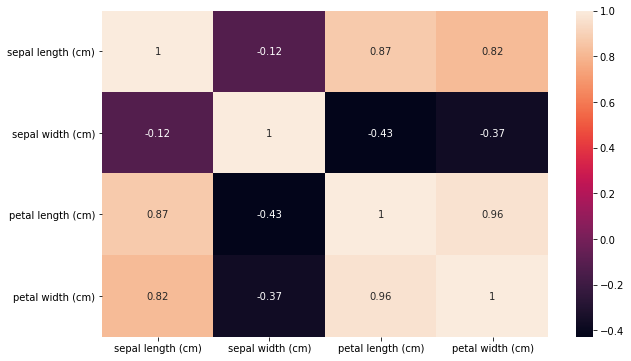

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(iris_df.corr(),annot=True)

# Finding the relationship between the dataset using pairplot

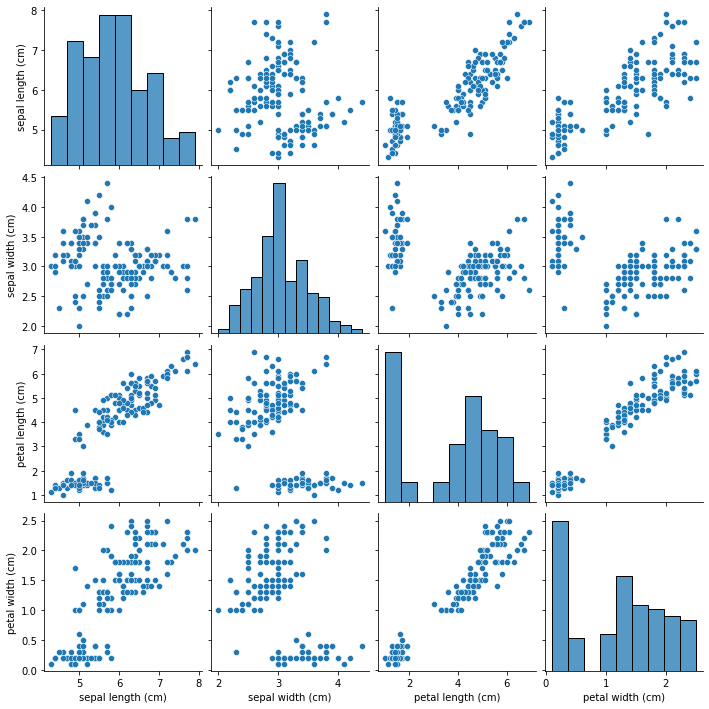

In [9]:
sns.pairplot(iris_df)

# Finding the optimum number of clusters for k-means classification

In [10]:
x = iris_df.iloc[:,:].values
from sklearn.cluster import KMeans
square_error = []
for K in range(1, 11):
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(x)
    square_error.append(kmeans.inertia_)


# Plotting the results onto a line graph, allowing us to observe 'The elbow'

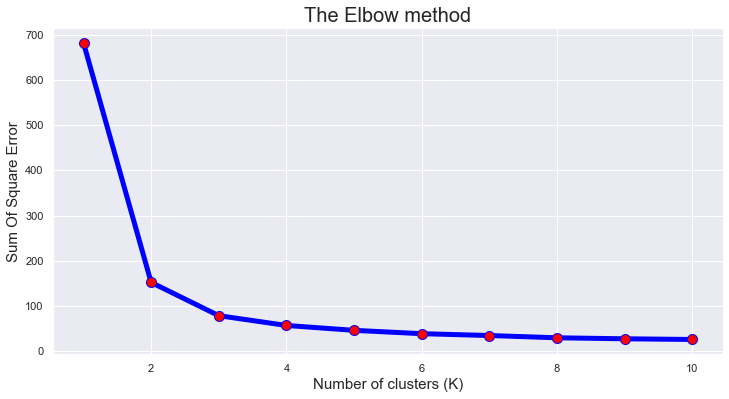

In [11]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), square_error,marker='o',c='blue',mfc='red',ms='10',linewidth='5')
plt.title('The Elbow method',size=20)
plt.xlabel('Number of clusters (K)',size=15)
plt.ylabel('Sum Of Square Error',size=15)
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs.

From this we choose the number of clusters as 3.

# Applying kmeans to the dataset 

In [12]:
km = KMeans(n_clusters=3)

# Creating the kmeans classifier

In [13]:
y_predicted=km.fit_predict(x)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

# Visualising the clusters

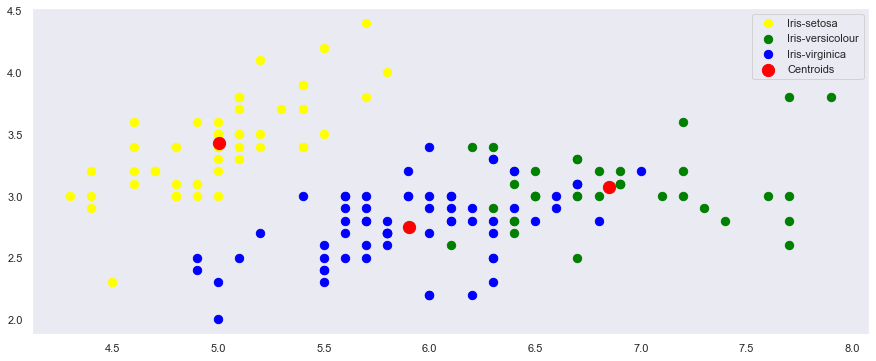

In [14]:
sns.set(style='dark')
plt.figure(figsize=(15,6))
plt.scatter(x[y_predicted == 0,0],x[y_predicted == 0,1], s = 70, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_predicted == 1,0],x[y_predicted == 1,1], s = 70, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_predicted == 2,0],x[y_predicted == 2,1], s = 70, c = 'blue', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 150, c = 'red', label = 'Centroids')
plt.legend()

# Updated Dataframe

In [15]:
iris_df['cluster'] = y_predicted
iris_df['cluster'].value_counts()


2    62
0    50
1    38
Name: cluster, dtype: int64

In [16]:
pd.set_option('display.max_rows',None)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
